In [1]:
%matplotlib inline


# OT for domain adaptation on empirical distributions


This example introduces a domain adaptation in a 2D setting. It explicits
the problem of domain adaptation and introduces some optimal transport
approaches to solve it.

Quantities such as optimal couplings, greater coupling coefficients and
transported samples are represented in order to give a visual understanding
of what the transport methods are doing.



In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import ot

generate data
-------------



In [3]:
n_samples_source = 150
n_samples_target = 150

Xs, ys = ot.datasets.get_data_classif('3gauss', n_samples_source)
Xt, yt = ot.datasets.get_data_classif('3gauss2', n_samples_target)

# Cost matrix
M = ot.dist(Xs, Xt, metric='sqeuclidean')

Instantiate the different transport algorithms and fit them
-----------------------------------------------------------



In [4]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization
ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=Xs, ys=ys, Xt=Xt)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xs)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)
transp_Xs_lpl1 = ot_lpl1.transform(Xs=Xs)

Fig 1 : plots source and target samples + matrix of pairwise distance
---------------------------------------------------------------------



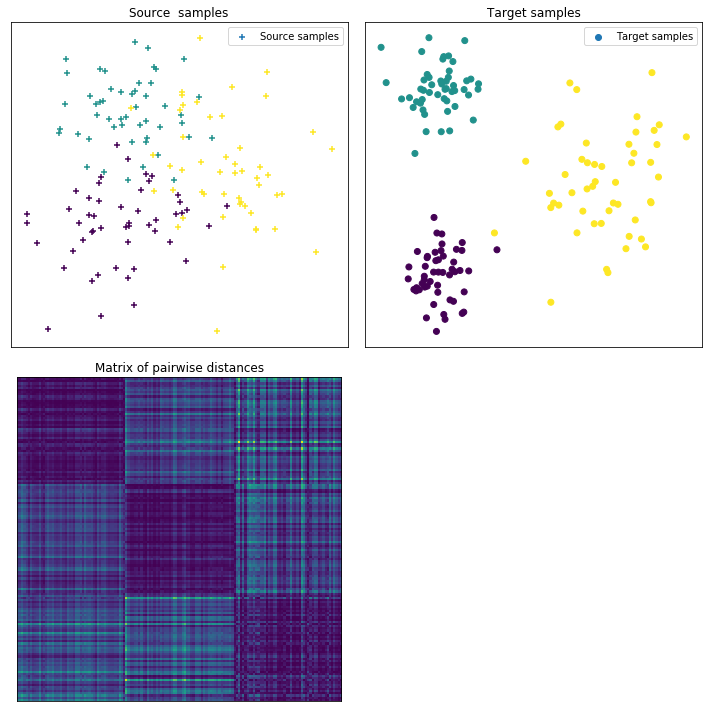

In [5]:
pl.figure(1, figsize=(10, 10))
pl.subplot(2, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(2, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')

pl.subplot(2, 2, 3)
pl.imshow(M, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Matrix of pairwise distances')
pl.tight_layout()

Fig 2 : plots optimal couplings for the different methods
---------------------------------------------------------



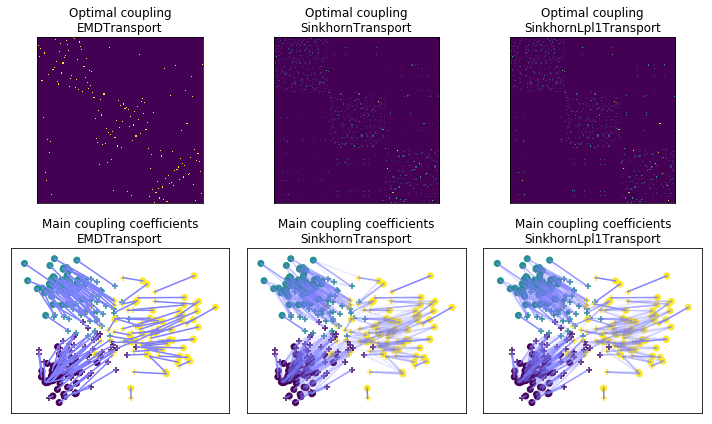

In [6]:
pl.figure(2, figsize=(10, 6))

pl.subplot(2, 3, 1)
pl.imshow(ot_emd.coupling_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDTransport')

pl.subplot(2, 3, 2)
pl.imshow(ot_sinkhorn.coupling_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

pl.subplot(2, 3, 3)
pl.imshow(ot_lpl1.coupling_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornLpl1Transport')

pl.subplot(2, 3, 4)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_emd.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nEMDTransport')

pl.subplot(2, 3, 5)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_sinkhorn.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nSinkhornTransport')

pl.subplot(2, 3, 6)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_lpl1.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nSinkhornLpl1Transport')
pl.tight_layout()

Fig 3 : plot transported samples
--------------------------------



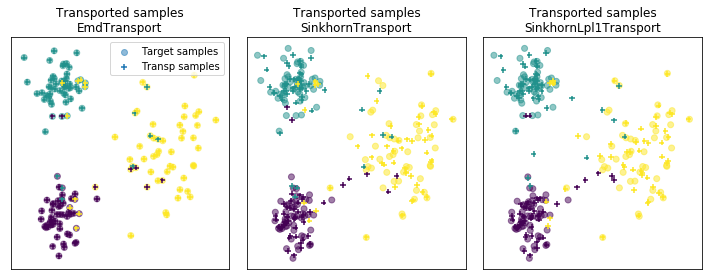

In [7]:
# display transported samples
pl.figure(4, figsize=(10, 4))
pl.subplot(1, 3, 1)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nEmdTransport')
pl.legend(loc=0)
pl.xticks([])
pl.yticks([])

pl.subplot(1, 3, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nSinkhornTransport')
pl.xticks([])
pl.yticks([])

pl.subplot(1, 3, 3)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_lpl1[:, 0], transp_Xs_lpl1[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nSinkhornLpl1Transport')
pl.xticks([])
pl.yticks([])

pl.tight_layout()
pl.show()